In [94]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import fastf1 as ff1
import fastf1.plotting
from timple.timedelta import strftimedelta
#from fastf1.core import Laps

import collections
from functools import cached_property
import logging
import warnings

import numpy as np
import pandas as pd

from fastf1 import api, ergast
from fastf1.utils import recursive_dict_get, to_timedelta


In [37]:
#ff1.Cache.enable_cache('cache') 

In [38]:
fastf1.plotting.setup_mpl()

In [40]:
# 2022
testing_session = ff1.get_testing_session(2022, 2, 2)

laps = testing_session.load_laps(with_telemetry=True)

/Users/yashberawala/opt/anaconda3/lib/python3.9/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Pre-Season Test - Practice 2 [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
core        WARNING 	No lap data for driver 23
core        WARNING 	No lap data for driver 14
core        WARNING 	No lap data for driver 11
core        WARNING 	No lap data for driver 10
core        WARNING 	No lap data for driver 3
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api      

In [8]:
# 2023
test_V2session = ff1.get_testing_session(2023, 1, 1)
laps = test_V2session.load_laps(with_telemetry=True)

/Users/yashberawala/opt/anaconda3/lib/python3.9/site-packages/fastf1/core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Pre-Season Testing - Practice 1 [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
api            INFO 	Fetching race control messages...
core           INFO 	Finished loading data for

In [44]:
test_V2session.event.get_session

<bound method Event.get_session of RoundNumber                                                 0
Country                                               Bahrain
Location                                               Sakhir
OfficialEventName    FORMULA 1 ARAMCO PRE-SEASON TESTING 2023
EventDate                                 2023-02-25 19:30:00
EventName                                  Pre-Season Testing
EventFormat                                           testing
Session1                                           Practice 1
Session1Date                              2023-02-23 10:00:00
Session2                                           Practice 2
Session2Date                              2023-02-24 10:00:00
Session3                                           Practice 3
Session3Date                              2023-02-25 10:00:00
Session4                                                 None
Session4Date                                              NaT
Session5                           

In [9]:
sessionv2 = fastf1.get_testing_event(2023, test_number=1)
#sessionv2.load()

In [10]:
drivers = pd.unique(test_V2session.laps['Driver'])
print(drivers)

['VER' 'RUS' 'SAI' 'HAM' 'DRU' 'OCO' 'HUL' 'ZHO' 'BOT' 'ALB' 'DEV' 'MAG'
 'LEC' 'ALO' 'GAS' 'NOR' 'SAR' 'TSU' 'PIA']


2023 Drivers

['VER' 'RUS' 'SAI' 'HAM' 'DRU' 'OCO' 'HUL' 'ZHO' 'BOT' 'ALB' 'DEV' 'MAG' 'LEC' 'ALO' 'GAS' 'NOR' 'SAR' 'TSU' 'PIA']

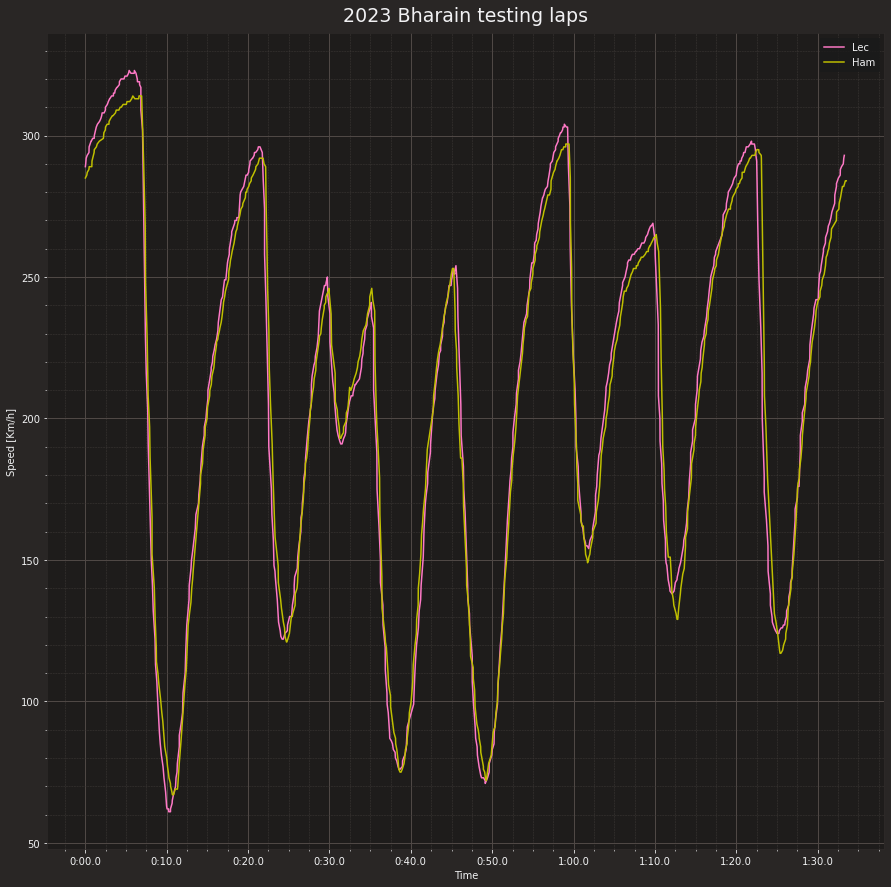

In [90]:
# 2023 Bharain testing 
# Plotting
fig, ax = plt.subplots()
ax.plot(tL, vCar, label='Lec')
#ax.plot(tV, vVCar, 'm', label='Ver')
ax.plot(th, vhCar, 'y', label='Ham')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('2023 Bharain testing laps')
ax.legend()
plt.autoscale()
plt.show()


In [70]:
#plot_size = [15, 15]
#plot_title = f"{testing_session.event.year} {testing_session.event.EventName} - {testing_session.name}"
#plot_ratios = [1, 3, 2, 1, 1, 2, 1]
#plot_filename = plot_title.replace(" ", "") + ".png"

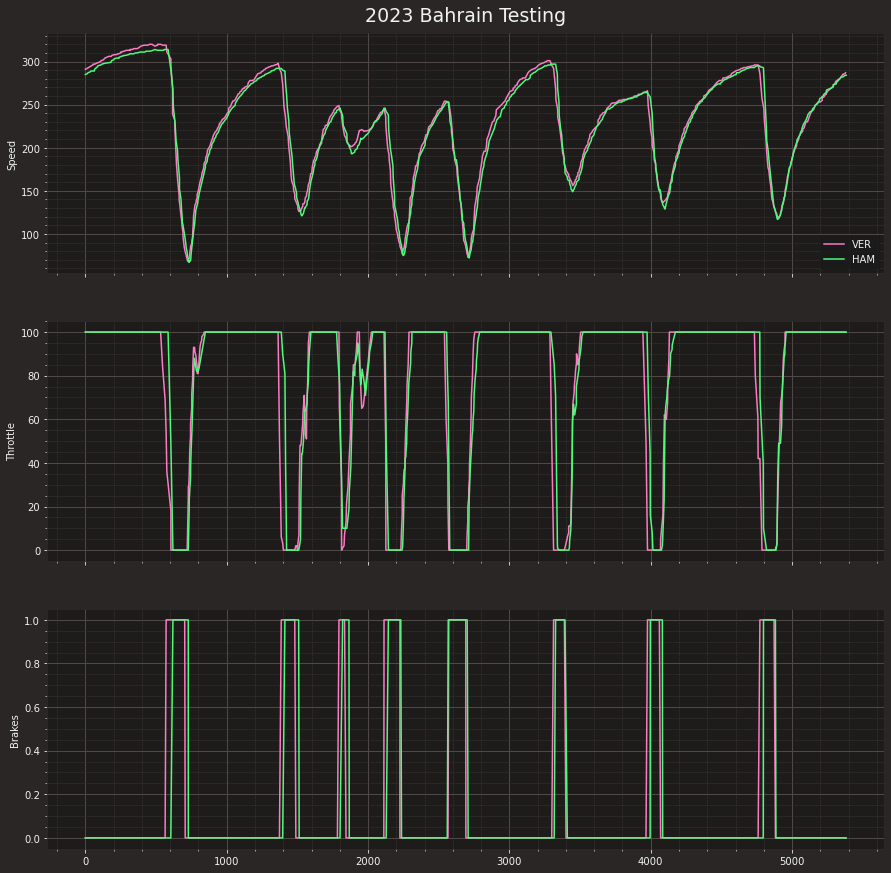

In [91]:
# Make plot a bit bigger
plt.rcParams['figure.figsize']

# Create subplots with different sizes
fig, ax = plt.subplots(3)

#plot title
ax[0].set_title("2023 Bahrain Testing")
ax[0].plot(ver_car_data['Distance'], ver_car_data['Speed'], label='VER')
ax[0].plot(ham_car_data['Distance'], ham_car_data['Speed'], label='HAM')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(ver_car_data['Distance'], ver_car_data['Throttle'], label='VER')
ax[1].plot(ham_car_data['Distance'], ham_car_data['Throttle'], label='HAM')
ax[1].set(ylabel='Throttle')

ax[2].plot(ver_car_data['Distance'], ver_car_data['Brake'], label='VER')
ax[2].plot(ham_car_data['Distance'], ham_car_data['Brake'], label='HAM')
ax[2].set(ylabel='Brakes')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.show()

In [15]:
drivers = pd.unique(testing_session.laps['Driver'])
print(drivers)

['SAI' 'FIT' 'HAM' 'OCO' 'ZHO' 'ALB' 'STR' 'LEC' 'ALO' 'PER' 'GAS' 'VET'
 'NOR' 'RUS' 'BOT']


In [72]:
#2022 Bharain

# Lec, Ver, Ham 2023 Bharain

#lec
lec = testing_session.laps.pick_driver('LEC').pick_fastest()
lec_car_data = lec.get_car_data()

tL2 = lec_car_data['Time']
vCar2 = lec_car_data['Speed']

#Ver
#ver = testing_session.laps.pick_driver('VER').pick_fastest()
#ver_car_data = ver.get_car_data()

tV2 = ver_car_data['Time']
vVCar2 = ver_car_data['Speed']

# Ham
ham = testing_session.laps.pick_driver('HAM').pick_fastest()
ham_car_data = ham.get_car_data()

th2 = ham_car_data['Time']
vhCar2 = ham_car_data['Speed']

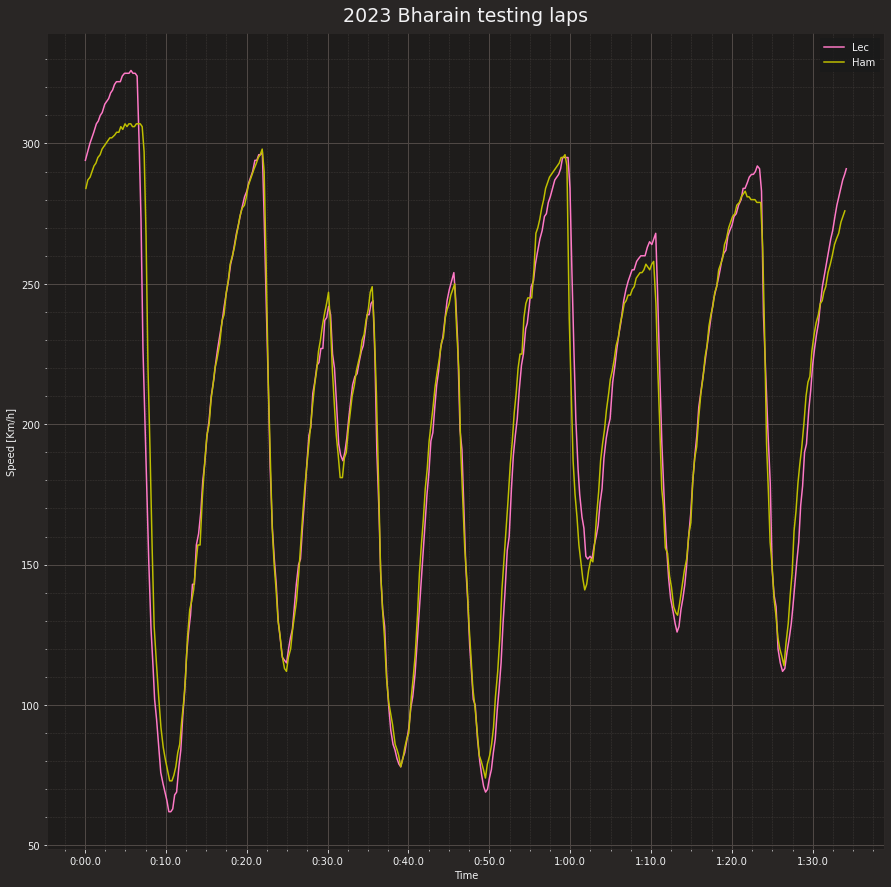

In [73]:
# 2023 Bharain testing 
# Plotting
fig, ax = plt.subplots()
ax.plot(tL2, vCar2, label='Lec')
#ax.plot(tV, vVCar, 'm', label='Ver')
ax.plot(th2, vhCar2, 'y', label='Ham')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('2023 Bharain testing laps')
ax.legend()
plt.autoscale()
plt.show()


In [87]:
#Alonso 2023
alo = test_V2session.laps.pick_driver('ALO').pick_fastest()
alo_car_data = alo.get_telemetry().add_distance()

tA2 = alo_car_data['Time']
vACar2 = alo_car_data['Speed']

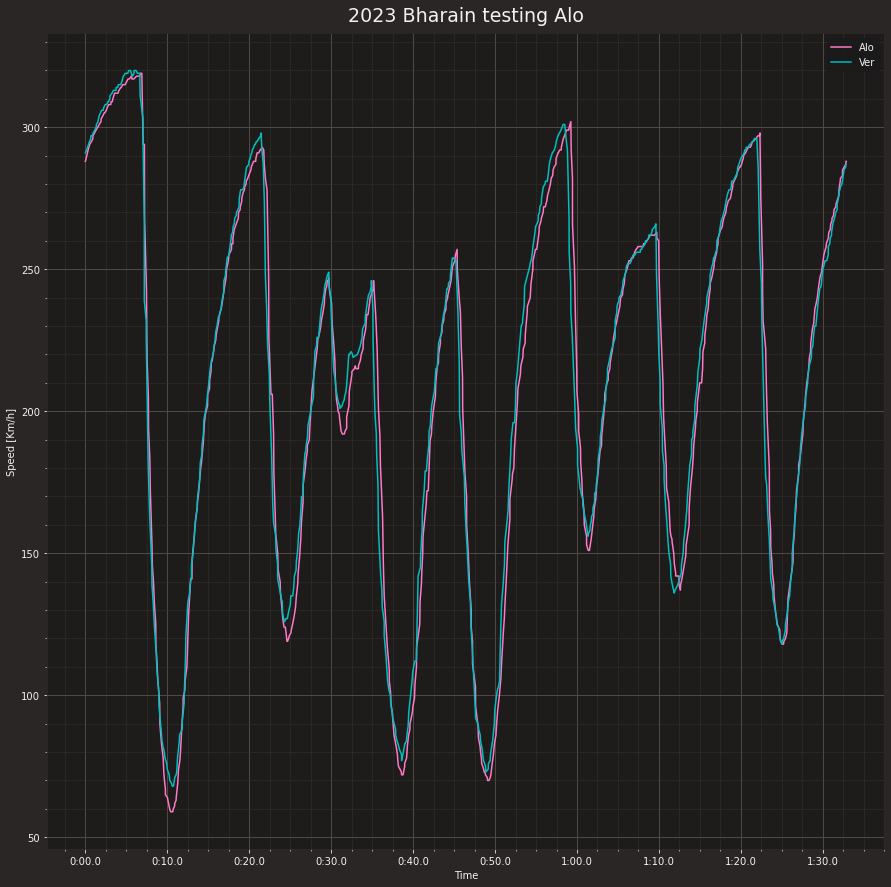

In [88]:
# 2023 Bharain testing 
# Plotting
fig, ax = plt.subplots()
ax.plot(tA2, vACar2, label='Alo')
ax.plot(tV, vVCar, 'c', label='Ver')
#ax.plot(th2, vhCar2, 'y', label='Ham')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title('2023 Bharain testing Alo')
ax.legend()
plt.autoscale()
plt.show()

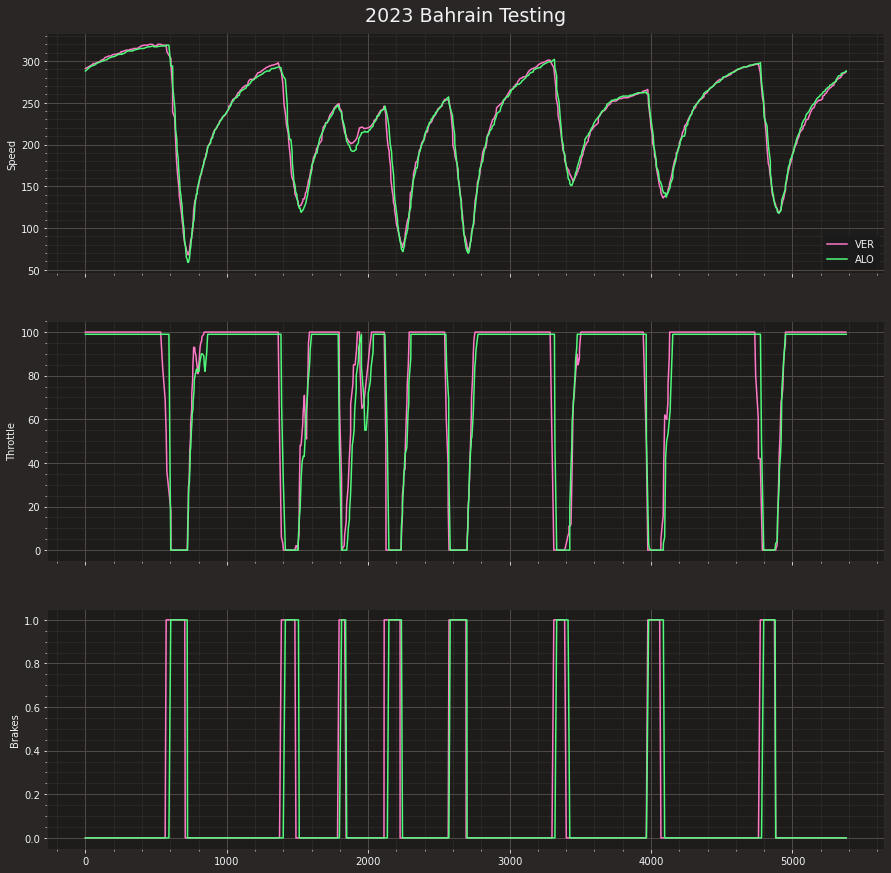

In [100]:
# Make plot a bit bigger
plt.rcParams['figure.figsize']

# Create subplots with different sizes
fig, ax = plt.subplots(3)

#plot title
ax[0].set_title("2023 Bahrain Testing")
ax[0].plot(ver_car_data['Distance'], ver_car_data['Speed'], label='VER')
#ax[0].plot(ham_car_data['Distance'], ham_car_data['Speed'], label='HAM')
ax[0].plot(alo_car_data['Distance'], alo_car_data['Speed'], label='ALO')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(ver_car_data['Distance'], ver_car_data['Throttle'], label='VER')
#ax[1].plot(ham_car_data['Distance'], ham_car_data['Throttle'], label='HAM')
ax[1].plot(alo_car_data['Distance'], alo_car_data['Throttle'], label='ALO')
ax[1].set(ylabel='Throttle')

ax[2].plot(ver_car_data['Distance'], ver_car_data['Brake'], label='VER')
#ax[2].plot(ham_car_data['Distance'], ham_car_data['Brake'], label='HAM')
ax[2].plot(alo_car_data['Distance'], alo_car_data['Brake'], label='ALO')
ax[2].set(ylabel='Brakes')

#ax[3].plot(ver_car_data['Distance'], ver_car_data['Gear'], label='VER')
#ax[2].plot(ham_car_data['Distance'], ham_car_data['Brake'], label='HAM')
#ax[3].plot(alo_car_data['Distance'], alo_car_data['Gear'], label='ALO')
#ax[3].set(ylabel='Gear')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.show()